## Step 1: Importing Required Libraries

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler , OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

## Step 2: Load the Dataset and Initial Exploration

In [211]:
df=pd.read_csv("dataset.csv")

In [212]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [213]:
df.shape

(1002, 17)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [215]:
df.describe()

,year,price,cylinders,mileage,doors
count,1002.000000,979.000000,897.000000,968.000000,995.000000
mean,2023.916168,50202.985700,4.975474,69.033058,3.943719
std,0.298109,18700.392062,1.392526,507.435745,0.274409
min,2023.000000,0.000000,0.000000,0.000000,2.000000
25%,2024.000000,36600.000000,4.000000,4.000000,4.000000
50%,2024.000000,47165.000000,4.000000,8.000000,4.000000
75%,2024.000000,58919.500000,6.000000,13.000000,4.000000
max,2025.000000,195895.000000,8.000000,9711.000000,5.000000


In [216]:
print(df.columns.tolist())


['name', 'description', 'make', 'model', 'year', 'price', 'engine', 'cylinders', 'fuel', 'mileage', 'transmission', 'trim', 'body', 'doors', 'exterior_color', 'interior_color', 'drivetrain']


In [217]:
df.dtypes

name               object
description        object
make               object
model              object
year                int64
price             float64
engine             object
cylinders         float64
fuel               object
mileage           float64
transmission       object
trim               object
body               object
doors             float64
exterior_color     object
interior_color     object
drivetrain         object
dtype: object

In [218]:
df.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [219]:
# For Missing values:
# - Numeric columns: fill with median
# - Categorical columns: fill with mode

numeric_col = df.select_dtypes(include=['int64','float64']).columns
categorical_col = df.select_dtypes(include=['object']).columns

df[numeric_col] = df[numeric_col].fillna(df[numeric_col].median())

for col in categorical_col:
    df[col] = df[col].fillna(df[col].mode()[0])

In [220]:
df.isnull().sum().sum()

0

In [221]:
print(" Numerical Columns:")
print(numeric_col.tolist())

print("\n Categorical Columns:")
print(categorical_col.tolist())

 Numerical Columns:
['year', 'price', 'cylinders', 'mileage', 'doors']

 Categorical Columns:
['name', 'description', 'make', 'model', 'engine', 'fuel', 'transmission', 'trim', 'body', 'exterior_color', 'interior_color', 'drivetrain']


In [222]:
for col in (categorical_col.tolist()):
    print(df[col].value_counts())
    print('*' * 40)

name
2023 Dodge Durango Pursuit                    33
2024 Jeep Compass Latitude                    28
2024 RAM 3500 Tradesman                       18
2024 Dodge Hornet R/T Plus                    15
2024 Volkswagen Taos 1.5T SE                  15
                                              ..
2024 Jeep Wagoneer L Series II Carbide 4x4     1
2024 Ford Escape S                             1
2024 Ford Bronco Wildtrak                      1
2024 Buick Envista Preferred                   1
2024 Chevrolet Silverado 2500 WT               1
Name: count, Length: 358, dtype: int64
****************************************
description
\n      \n        .\n      \n                                                                                                                                                                                                                                                                                                                                               

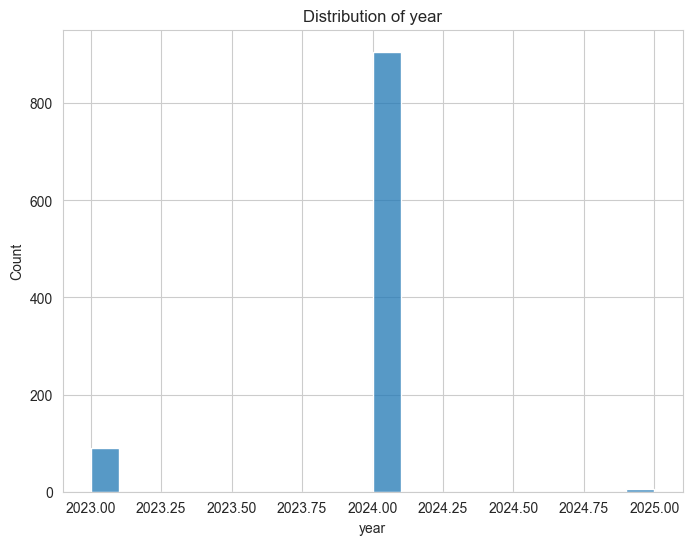

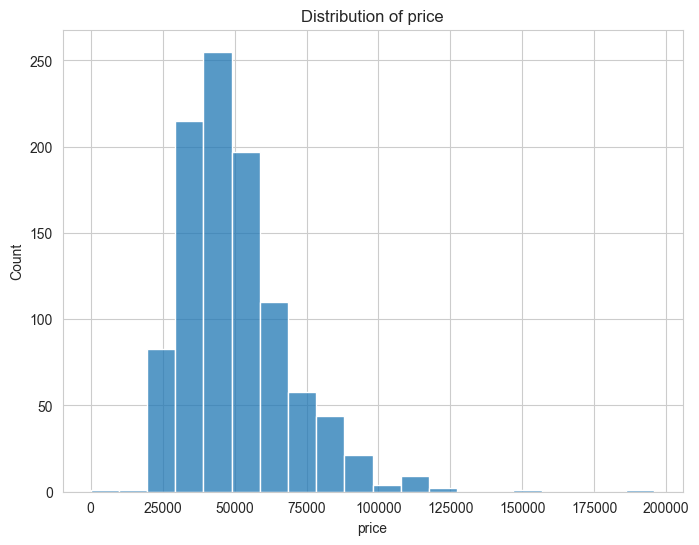

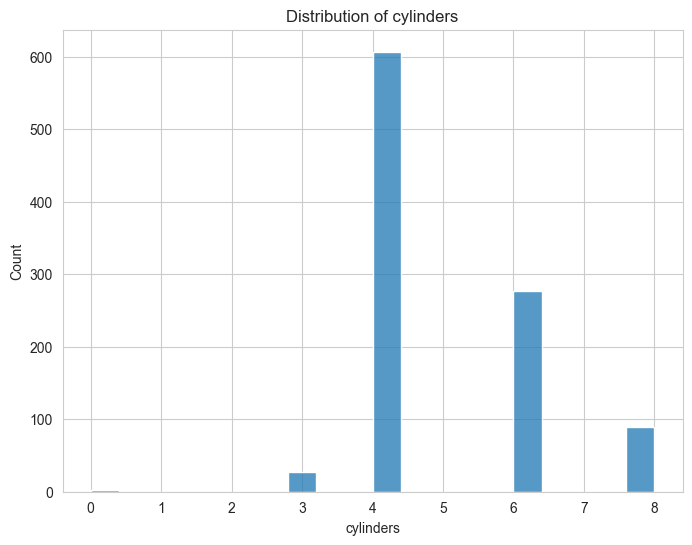

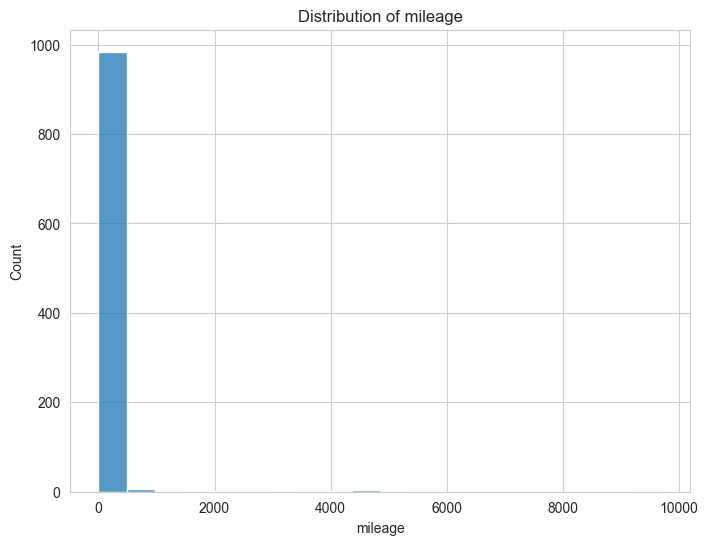

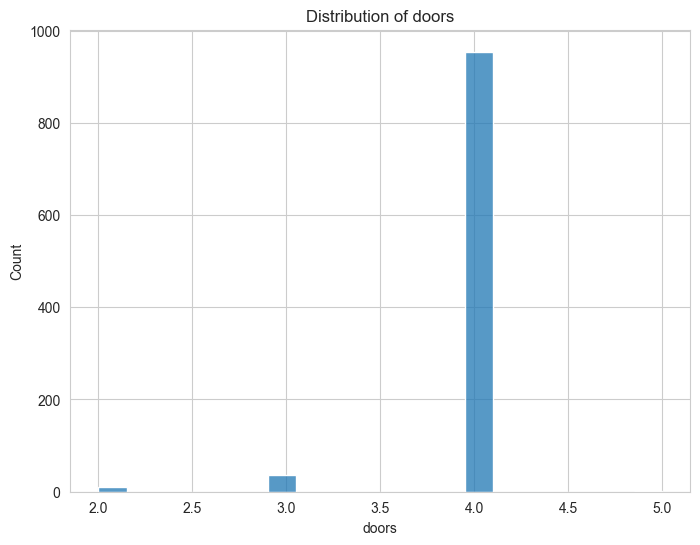

In [223]:
for col in numeric_col:
    plt.figure(figsize=(8,6))
    sns.histplot(x=df[col],data=df,bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

In [224]:
# Calculate correlation matrix for numerical features
corr_matrix = df[numeric_col].corr()

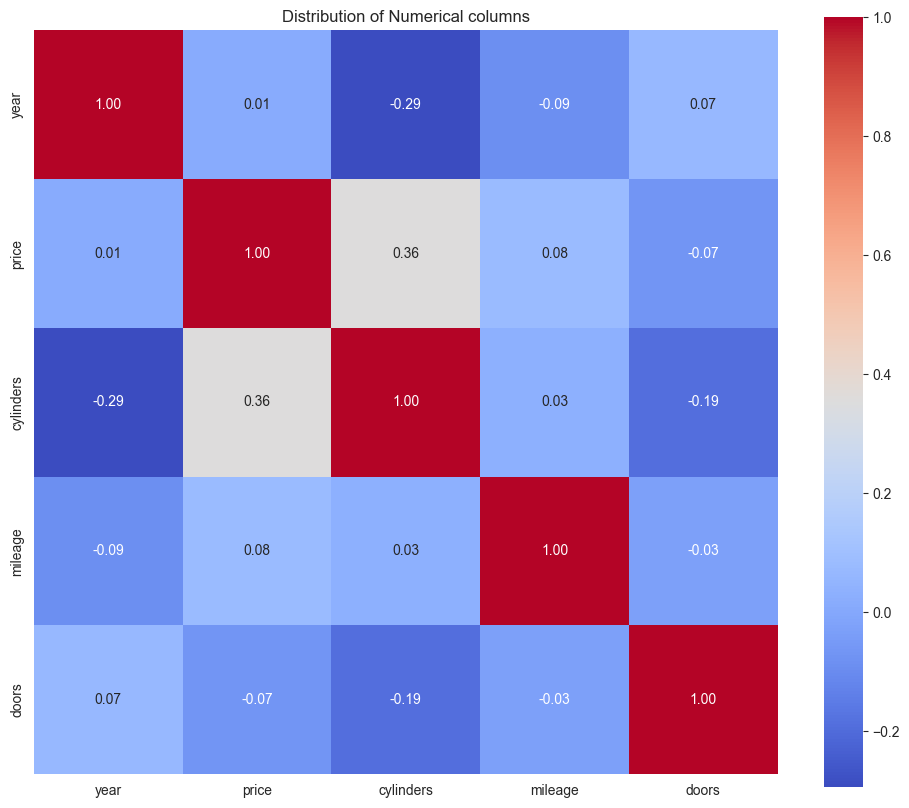

In [225]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix,annot=True,fmt='.2f',square=True,cmap='coolwarm')
plt.title('Distribution of Numerical columns')
plt.show()

In [226]:
target_col = 'price'

In [227]:
correlation_with_target = corr_matrix[target_col].sort_values(ascending=False)
print("\n Correlation with target variable:")
print(correlation_with_target)


 Correlation with target variable:
price        1.000000
cylinders    0.357229
mileage      0.076750
year         0.011891
doors       -0.069782
Name: price, dtype: float64


In [228]:
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,\n \n .\n \n,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [229]:
X=df.drop(columns='price')
Y=df['price']

In [240]:
Numeric_columns = ['year','cylinders', 'mileage','doors']


Categorical_columns = ['name', 'description', 'make', 'model', 'engine', 'fuel', 'transmission', 'trim', 'body', 'exterior_color', 'interior_color', 'drivetrain']


In [241]:
# Preprocessing for numeric columns
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

In [242]:
# Preprocessing for categorical columns
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [243]:
# Combine both into a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, Numeric_columns),
        ('cat', categorical_transformer, Categorical_columns)
    ]
)


In [244]:
models = {
    "linear_regression": LinearRegression(),
    "random_forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "xgboost": xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [245]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [246]:
results = {}
best_model = None
best_score = -np.inf

for name, model in models.items():
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[name] = {"R2": r2, "MAE": mae, "RMSE": rmse}
    
    print(f"\n{name} Performance:")
    print(f"R2 Score: {r2:.4f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    
    # Select best model by R²
    if r2 > best_score:
        best_score = r2
        best_model = pipe


linear_regression Performance:
R2 Score: 0.4698
MAE: 5346.44
RMSE: 11625.55

random_forest Performance:
R2 Score: 0.8124
MAE: 3898.55
RMSE: 6914.64

xgboost Performance:
R2 Score: 0.8131
MAE: 4548.14
RMSE: 6901.61


In [247]:
# Save best model
joblib.dump(best_model, "vehicle_price_prediction.pkl")
print(f"\nBest model saved: {type(best_model.named_steps['model']).__name__}")

# Save feature names for app.py
joblib.dump(X.columns.tolist(), "feature_names.pkl")


Best model saved: XGBRegressor


['feature_names.pkl']

# Model Visualation

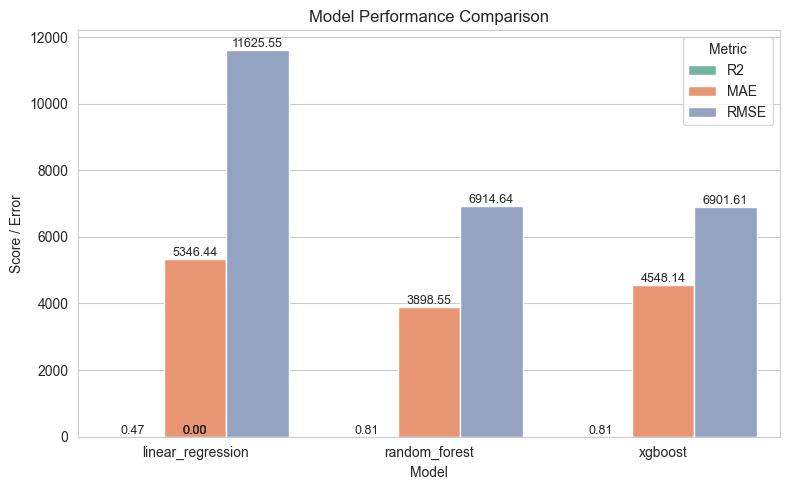

In [248]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert results dictionary to DataFrame
results_df = pd.DataFrame(results).T.reset_index()
results_df.rename(columns={'index': 'Model'}, inplace=True)

# Melt DataFrame for grouped bar plot
results_melted = results_df.melt(id_vars="Model", 
                                  value_vars=["R2", "MAE", "RMSE"],
                                  var_name="Metric", 
                                  value_name="Value")

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=results_melted, x="Model", y="Value", hue="Metric", palette="Set2")

# Add value labels
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().annotate(f"{height:.2f}", 
                       (p.get_x() + p.get_width() / 2., height),
                       ha='center', va='bottom', fontsize=9)

plt.title("Model Performance Comparison")
plt.ylabel("Score / Error")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()



In [249]:
import pandas as pd
import numpy as np

print(X_test.dtypes)  # See which columns are not numeric
print(X_test.isnull().sum())  # Check missing values


name               object
description        object
make               object
model              object
year                int64
engine             object
cylinders         float64
fuel               object
mileage           float64
transmission       object
trim               object
body               object
doors             float64
exterior_color     object
interior_color     object
drivetrain         object
dtype: object
name              0
description       0
make              0
model             0
year              0
engine            0
cylinders         0
fuel              0
mileage           0
transmission      0
trim              0
body              0
doors             0
exterior_color    0
interior_color    0
drivetrain        0
dtype: int64
